## Data : Default data

### Use Naive Bays model and find out prediction of Default data.

#### independe variables are Income and balance and depenedet (response variable) is default (classifer as yes and no)

In [13]:

import numpy as np
import pandas as pd

Default = pd.read_csv("E:/class/Python_cource/dataset_new/Datasets/Default.csv")
dum_Default = pd.get_dummies(Default, drop_first=True)
Default.head()
dum_Default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

X = dum_Default.iloc[:,[0,1,3]]
y = dum_Default.iloc[:,2]


In [15]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [16]:

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

## accuracy score is 0.97033 which is very good

[[2883   17]
 [  72   28]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2900
           1       0.62      0.28      0.39       100

   micro avg       0.97      0.97      0.97      3000
   macro avg       0.80      0.64      0.69      3000
weighted avg       0.96      0.97      0.96      3000

0.9703333333333334


#### Accuracy score is 0.97033 which is very good

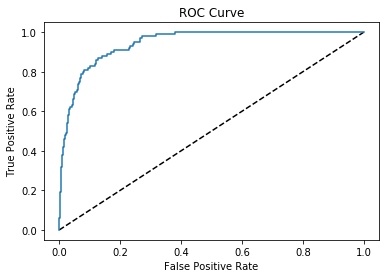

In [17]:

# ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
probs = gaussian.predict_proba(X_test)
y_pred_prob = probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [18]:
roc_auc_score(y_test, y_pred_prob)


0.9440344827586207

#### ROC_AUC_Score is 0.9440344827586207 which is very good.